In [24]:
import os
import pathlib as pl
import sys
import time

repo_dir = pl.Path(os.path.dirname(os.getcwd()))
sys.path.append(str(repo_dir / 'AMDC-Firmware' / 'scripts'))

from AMDC import AMDC
from AMDC_Logger import AMDC_Logger, find_mapfile
from AMDC_LivePlot import AMDC_LivePlot

amdc = AMDC()

# After creating the amdc object...

# Set comm defaults for UART
amdc.setup_comm_defaults('eth')

# Init ethernet 
amdc.eth_init()

# Set up the default ASCII command socket
s0, s0_id = amdc.eth_new_socket('ascii_cmd')
amdc.eth_set_default_ascii_cmd_socket(s0)

# Cretae AMDC Logger Object
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)

	> gen_ctrl init
['gen_ctrl init', 'SUCCESS']
	> log info
	> log reg 0 LOG_Va 537542736 1000 double
['log reg 0 LOG_Va 537542736 1000 double', 'SUCCESS']
	> log reg 1 LOG_Vb 537542744 1000 double
['log reg 1 LOG_Vb 537542744 1000 double', 'SUCCESS']
	> log reg 2 LOG_Vc 537542752 1000 double
['log reg 2 LOG_Vc 537542752 1000 double', 'SUCCESS']
	> log info
Error: Variable already exists
Error: Variable already exists
Error: Variable already exists


<IPython.core.display.Javascript object>


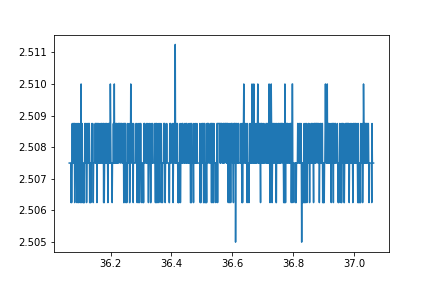

	> log stream start 0 1
['log stream start 0 1', 'SUCCESS']


<IPython.core.display.Javascript object>


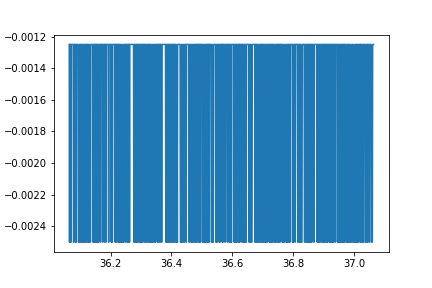

	> log stream start 1 2
['log stream start 1 2', 'SUCCESS']


<IPython.core.display.Javascript object>


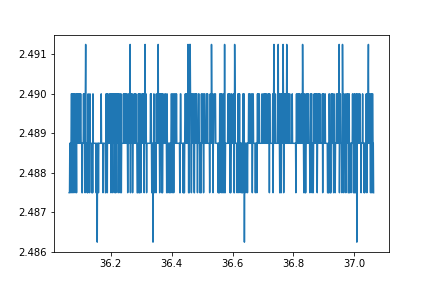

	> log stream start 2 3
['log stream start 2 3', 'SUCCESS']


In [25]:
# Define Command
cmd_str = 'gen_ctrl init'
# Send command
amdc.cmd(cmd_str)

# Setup Logger
logger.sync()

# Register Vars
logger.register('Va Vb Vc', samples_per_sec = 1000, var_type = 'double')

# Streaming Log Example

# Jupyter notebook command for live plot
%matplotlib notebook

# Setup Logger
logger.sync()

# Register Vars
logger.register('Va Vb Vc', samples_per_sec = 1000, var_type = 'double')

# plot w/ 1,000ms frame update w/ a 0.1s window length
# plot = AMDC_LivePlot(logger, 'Va', window_sec = 1000, 0.1)
p1 = AMDC_LivePlot(logger, 'Va', window_sec = 1)
p1.start_stream()
p1.show()

p2 = AMDC_LivePlot(logger, 'Vb', window_sec = 1)
p2.start_stream()
p2.show()

p3 = AMDC_LivePlot(logger, 'Vc', window_sec = 1)
p3.start_stream()
p3.show()

In [26]:
##### CELL START #####
p1.stop_stream()
p2.stop_stream()
p3.stop_stream()

# Return to static inline plots
%matplotlib inline

# Unregister Vars
logger.unregister_all()

# Define Command
cmd_str = 'gen_ctrl deinit'
# Send command
amdc.cmd(cmd_str)

	> log stream stop 0 1
['log stream stop 0 1', 'SUCCESS']
	> log stream stop 1 2
['log stream stop 1 2', 'SUCCESS']
	> log stream stop 2 3
['log stream stop 2 3', 'SUCCESS']
	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> gen_ctrl deinit
['gen_ctrl deinit', 'SUCCESS']


['gen_ctrl deinit', 'SUCCESS']

In [21]:
# Buffered Logging Example
logger.empty_all()
logger.start()

# Tell your controller to do something cool
#do_something_cool()

# Record data for 1 second after the cool event
time.sleep(1)

logger.stop()


# Record data for about half second
#logger.log(duration = 0.5)

# Retrieve Data
# data = logger.dump()
data = logger.dump(log_vars = 'Va')
# data = logger.dump(log_vars = 'foo bar', file = 'my_data.csv')
# data = logger.dump(
#    log_vars = 'foo bar',
#    file = 'my_data.csv',
#    comment = 'the motor appeared to run smooth')

# Convert position data from meters to um
t0 = 0 # [sec]
t1 = 0.1 # [sec]

marker = '.'

ax = data[t0:t1].plot(marker=marker)
ax.set_ylabel("Duty Ratio")

	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log stop', 'SUCCESS']
	> log dump eth bin 0
Dumping: LOG_Va
ERROR: timeout, could not find footer!
failed loading LOG_Va... retrying

	> log dump eth bin 0
Dumping: LOG_Va
ERROR: timeout, could not find footer!
failed loading LOG_Va... retrying

	> log dump eth bin 0
Dumping: LOG_Va
ERROR: timeout, could not find footer!
failed loading LOG_Va... retrying

	> log dump eth bin 0
Dumping: LOG_Va
ERROR: timeout, could not find footer!


Exception: Loading Data Failed